# Demo on Orange County Convention Center Modules
This notebook demonstrates the package's functionality on a batch of PV modules from the Orange County Convention Center in Orlando, FL.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import os
from os.path import basename
from src.iv_distribution_analysis import *
from src.iv_distribution_visualization import *

from batch_config import batch_data_dict
import SintonFMT_LIB as S

In [ ]:
# Get files
iv_files = os.listdir(batch_data_dict['iv_dir'])
iv_mfr = [ivf for ivf in iv_files if '.mfr' in ivf]

# This accounts for filenames that start with an underscore rather than a hyphen
if batch_data_dict['initial_basename_underscore']:
    iv_mfr = [filename.replace('_', '-', 1) for filename in iv_mfr]

batch_data = get_avg_param_per_module(iv_mfr, batch_data_dict['iv_dir'], batch_data_dict['suns_to_iter'])

Analyzing IVT20250218-SOLARWORLD_SW-175-MONO-20250218_092848_409050370_X_02.mfr
Analyzing IVT20250218-SOLARWORLD_SW-175-MONO-20250218_112730_409050969_X_01.mfr
Analyzing IVT20250207-SOLARWORLD_SW-175-MONO-20250207_175206_408330775_X_01.mfr
Analyzing IVT20250218-SOLARWORLD_SW-175-MONO-20250218_092716_409050370_X_01.mfr
Analyzing IVT20250214-SOLARWORLD_SW-175-MONO-20250214_173035_409050971_X_01.mfr
Analyzing IVT20250217-SOLARWORLD_SW-175-MONO-20250217_090306_408386708_X_02.mfr
Analyzing IVT20240527-SOLARWORLD_SW165-MONO-20240527_124223_408181737_X_01.mfr
Analyzing IVT20250214-SOLARWORLD_SW-175-MONO-20250214_163402_409051208_X_02.mfr
Analyzing IVT20250207-SOLARWORLD_SW-175-MONO-20250207_170926_409050368_X_01.mfr
Analyzing IVT20250214-SOLARWORLD_SW-175-MONO-20250214_181105_409050692_X_01.mfr
Analyzing IVT20250218-SOLARWORLD_SW-175-MONO-20250218_095049_409004583_X_02.mfr
Analyzing IVT20250218-SOLARWORLD_SW-175-MONO-20250218_103819_408353673_X_02.mfr
Analyzing IVT20250207-SOLARWORLD_SW-175-M

In [ ]:
batch_norm = subset_by_intensity(batch_data, 1, 0.01)

if batch_data_dict['control']:
    control_dict = get_control_data_at_intensity(batch_data, 1)

if batch_data_dict['control']:
    norm_method = 'control'
    batch_norm = norm_to_control(control_dict, batch_data_dict['cols_to_calc'], batch_norm)
    pct_cols = ['pmp_pct_norm', 'vmp_pct_norm', 'imp_pct_norm', 'voc_pct_norm', 'isc_pct_norm']
else:
    norm_method = 'nameplate'
    batch_norm = norm_to_nameplate(batch_data_dict, batch_data_dict['cols_to_calc'], batch_norm)
    pct_cols = ['pmp_pct_namepl', 'vmp_pct_namepl', 'imp_pct_namepl', 'voc_pct_namepl', 'isc_pct_namepl']

# Compute percentages for everything except control module
batch_norm = batch_norm[batch_norm['serial'] != batch_data_dict['control']].groupby('serial')[pct_cols].mean()

,pmp_pct_namepl,vmp_pct_namepl,imp_pct_namepl,voc_pct_namepl,isc_pct_namepl
serial,,,,,
408106229,0.391138,0.851655,0.458665,0.982026,0.616671
408181737,0.952144,1.032882,0.920622,1.008581,0.956424
408203627,0.413372,0.903700,0.456822,0.983025,0.611777
408322647,0.758814,1.004596,0.754351,0.995338,0.806480
408327672,0.773605,0.981859,0.786864,0.989008,0.846871
408330104,0.720338,0.946963,0.759686,0.989960,0.894083
408330775,0.709595,0.968359,0.731819,0.997213,0.897121
408332844,0.648323,0.997027,0.649401,0.997588,0.901358
408332881,0.741293,0.961579,0.769901,0.995364,0.893196


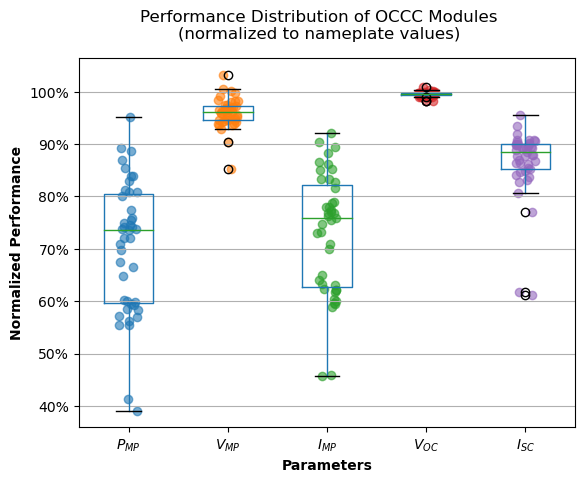

                                 pmp    imp     vmp    isc     voc
mean                          89.671  2.639  33.832  3.341  43.648
mean (w/o underperforming)    91.324  2.681  33.955  3.377  43.674
median                        86.593  2.564  33.852  3.039  43.716
median (w/o underperforming)  87.732  2.597  33.944  3.324  43.730


In [5]:
fig, ax = plt.subplots(1)
batch_norm[pct_cols].boxplot(ax=ax) # pct_cols defined above

col_nums = range(1, 6)
for col, col_num in zip(pct_cols, col_nums):
    jitter_scatter(batch_norm[col], ax, col_num)

ax.set_xticks(ticks=ax.get_xticks(), labels=[r'$P_{MP}$', r'$V_{MP}$', r'$I_{MP}$', r'$V_{OC}$', r'$I_{SC}$'])
ax.set_xlabel("Parameters", fontweight='bold')
ax.set_ylabel("Normalized Performance", fontweight='bold')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
ax.grid(axis='x')

fig.suptitle(f"Performance Distribution of {batch_data_dict['identifier']} Modules\n(normalized to {norm_method} values)")
plt.show()

# Print out summary statistics
print(output_summary_stats(batch_data, batch_data_dict['cols_to_calc'], batch_data_dict['underperforming_serials']))

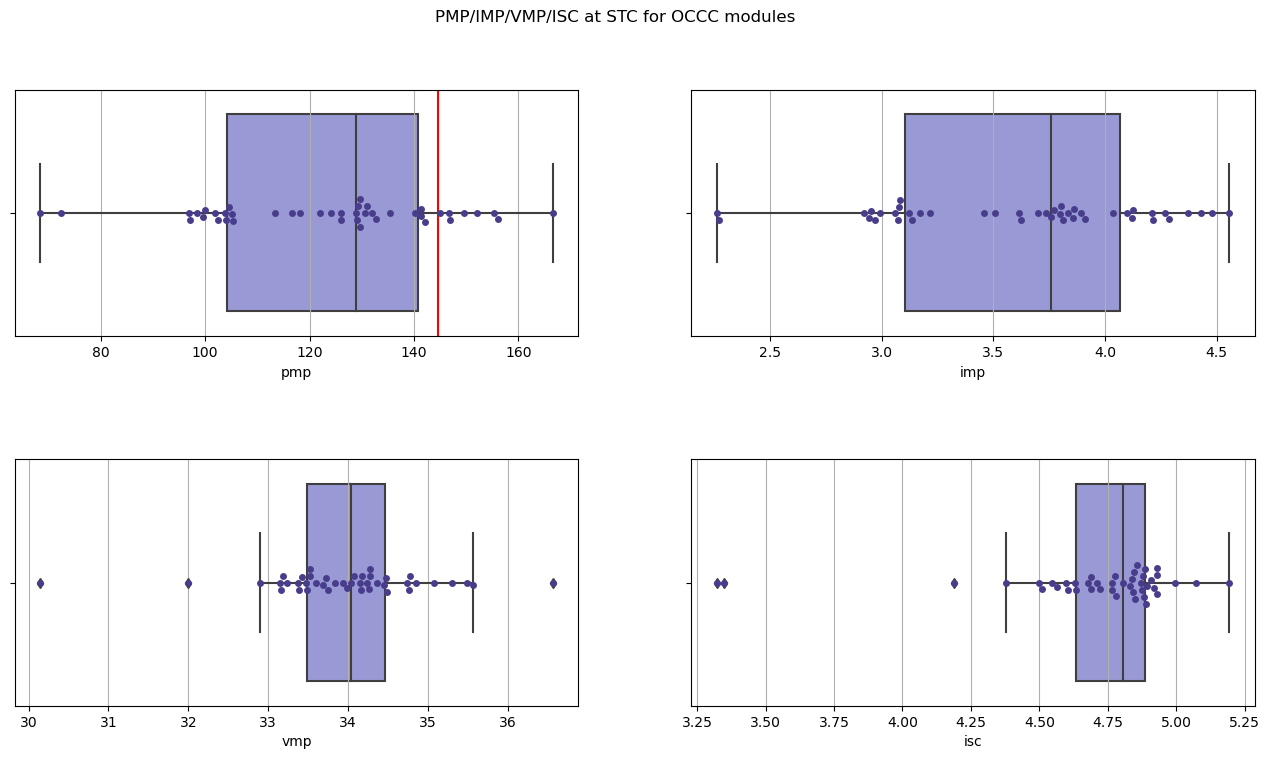

In [6]:
est_annual_degrad = 0.01
years = batch_data_dict['years']
nameplate = batch_data_dict['pmp_nameplate']
est_pmp = estimate_pmp_degrad(est_annual_degrad, years, nameplate)

# Group by serial
params = ['pmp', 'imp', 'vmp', 'isc', 'voc']
batch_data_avg = batch_data[np.abs(batch_data['intensity'] - 1.00) < 0.05].copy()
batch_data_avg = batch_data_avg.groupby('serial')[params].mean()

# Plot four parameters
fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharex='none', gridspec_kw={'hspace': 0.5})
params_to_plot = ['pmp', 'imp', 'vmp', 'isc']
axes = axes.flatten()

for ax, param in zip(axes, params_to_plot):
    ax.grid()
    sns.swarmplot(ax=ax, x=batch_data_avg[param], color='darkslateblue')
    sns.boxplot(ax=ax, x=batch_data_avg[param], boxprops={'facecolor': (0, 0, 0.6, 0.4)})

axes[0].axvline(x=est_pmp, color='red', label=f'{est_annual_degrad * 100}% annual\ndegradation')
fig.suptitle(f"PMP/IMP/VMP/ISC at STC for {batch_data_dict['identifier']} modules\n")
plt.show()

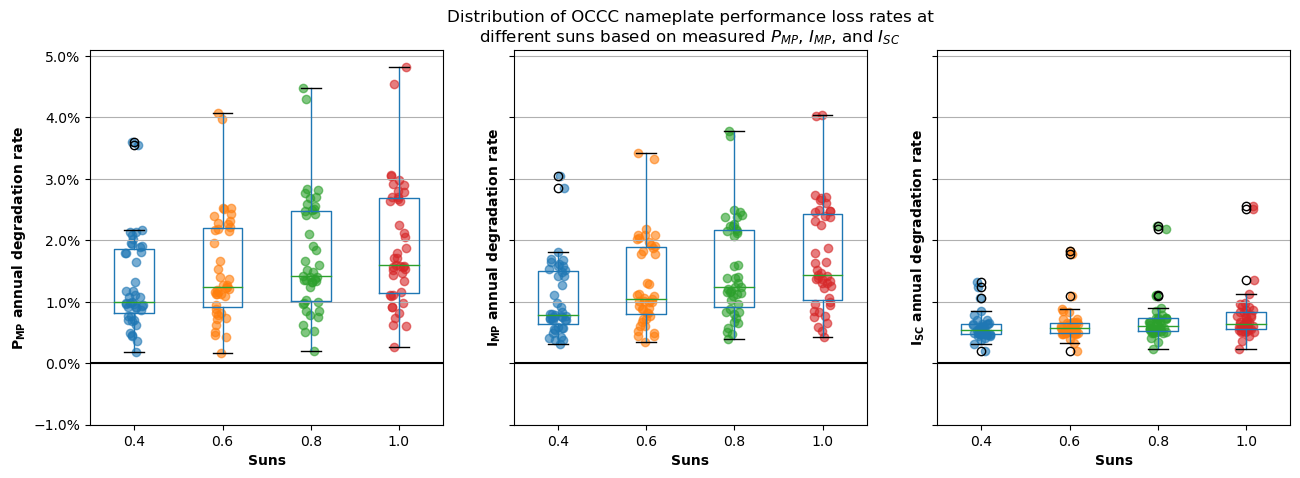

In [7]:
plr_params = ['pmp', 'imp', 'isc']

# Creates mapped_intensty col rounded to nearest 0.05
batch_data_plr = batch_data.copy()
batch_data_plr['mapped_intensity'] = round_intensity(batch_data_plr['intensity'], 0.05)
batch_data_plr = batch_data_plr.groupby(['serial', 'mapped_intensity'], as_index=False)[plr_params].mean()
batch_data_plr = batch_data_plr.apply(lambda row: compute_row(row, plr_params), axis=1)

# Filter out anomalous mapped intensities 
batch_data_plr = batch_data_plr[batch_data_plr['mapped_intensity'].isin(batch_data_dict['suns_to_iter'])]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

batch_data_plr.boxplot(column='pmp_plr', by='mapped_intensity', ax=axes[0])
batch_data_plr.boxplot(column='imp_plr', by='mapped_intensity', ax=axes[1])
batch_data_plr.boxplot(column='isc_plr', by='mapped_intensity', ax=axes[2])

intensities = batch_data_dict['suns_to_iter']
col_nums = range(1, 5)

for sun, num in zip(intensities, col_nums):
    jitter_scatter(batch_data_plr[batch_data_plr['mapped_intensity'] == sun]['pmp_plr'], axes[0], num)
    jitter_scatter(batch_data_plr[batch_data_plr['mapped_intensity'] == sun]['imp_plr'], axes[1], num)
    jitter_scatter(batch_data_plr[batch_data_plr['mapped_intensity'] == sun]['isc_plr'], axes[2], num)

axes[0].set_ylabel('$\mathbf{P_{MP}}$ annual degradation rate', fontweight='bold')
axes[1].set_ylabel('$\mathbf{I_{MP}}$ annual degradation rate', fontweight='bold')
axes[2].set_ylabel('$\mathbf{I_{SC}}$ annual degradation rate', fontweight='bold')

max_loss = batch_data_plr[['pmp_plr', 'imp_plr', 'isc_plr']].max().max()
ylim_top = round(max_loss * 1.05, 3)

for ax in axes.flatten():
    ax.set_xlabel('Suns', fontweight='bold')
    ax.grid(axis='x')
    ax.set_title('')
    ax.set_ylim(-0.01, ylim_top)
    ax.axhline(y=0, color='black')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))

identifier = batch_data_dict['identifier']
fig.suptitle(f'Distribution of {identifier} nameplate performance loss rates at\ndifferent suns based on measured $P_{{MP}}$, $I_{{MP}}$, and $I_{{SC}}$')

plt.show()

In [8]:
# t-test on average PLRs

group1 = batch_data_plr[batch_data_plr['mapped_intensity'] == 0.4]['pmp_plr']
group2 = batch_data_plr[batch_data_plr['mapped_intensity'] == 1]['pmp_plr']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

t-statistic: -3.219, p-value: 0.002


In [10]:
# Switch underscore back to hyphen since I-V analysis references filenames
if batch_data_dict['initial_basename_underscore']:
    iv_mfr = [filename.replace('-', '_', 1) for filename in iv_mfr]

/Users/calebjore/anaconda3/lib/python3.11/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


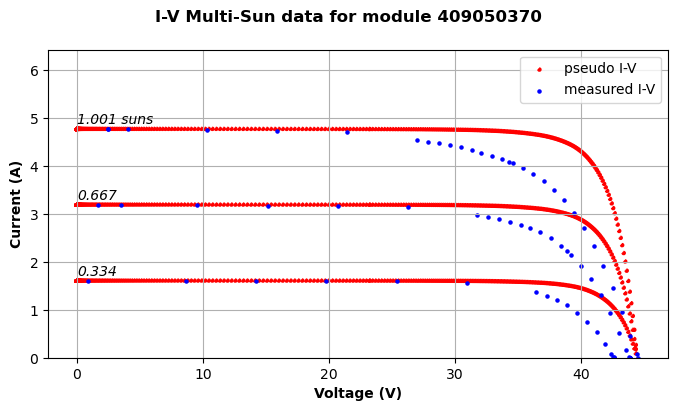

In [11]:
fig, ax = plt.subplots(1, figsize=(8, 4))
ax.set_ylim(0, batch_data_dict['isc_nameplate'] + 1)

# Select serial (default: first serial in batch_data) and choose number of curves
serial = batch_data['serial'][0]
curves = 3
file = get_serial_file(serial, iv_mfr, batch_data_dict['iv_dir'])
plot_iv_curves_mfr(file, curves, ax)

fig.suptitle(f"I-V Multi-Sun data for module {serial}", fontweight='bold')
ax.grid()
ax.set_xlabel('Voltage (V)', fontweight='bold')
ax.set_ylabel('Current (A)', fontweight='bold')
ax.plot()

plt.show()

In [12]:
batch_data_stc = batch_data[np.abs(batch_data['intensity'] - 1.00) < 0.05].copy()
summary_data = output_summary_stats(batch_data_stc, batch_data_dict['cols_to_calc'], batch_data_dict['underperforming_serials'])

# Uncomment for summary CSVs
#batch_data.to_csv(f'{identifier}_data.csv', index=False)
#summary_data.to_csv(f'{identifier}_summary_stats.csv', index=True)